<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/GAM_optim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pygam
!pip install pytimetk


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 46.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 759.7/759.7 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

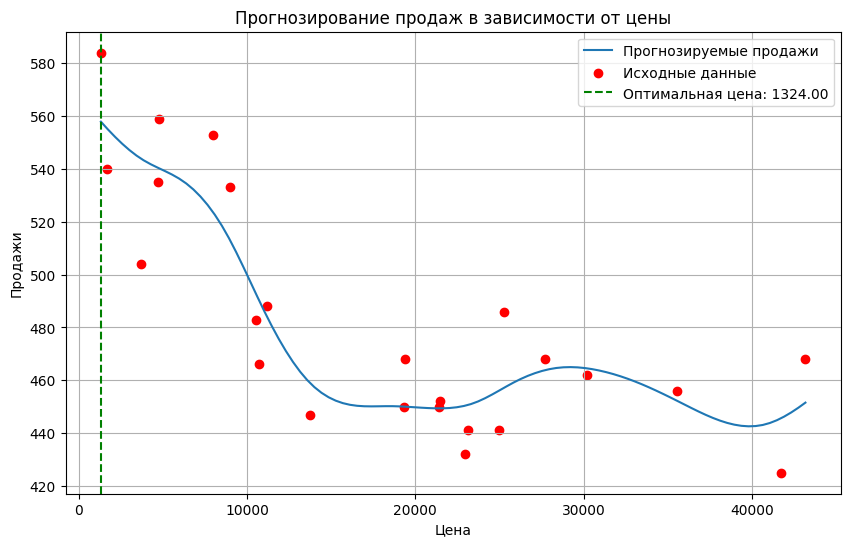

(1324.0, 557.8988835091549)

In [ ]:
import numpy as np
from pygam import LinearGAM, s
import matplotlib.pyplot as plt

# Данные
prices = np.array([1324, 1706, 3735, 11195, 13751, 4755, 10556, 4733, 10701, 21422, 22981, 7994, 21457, 23159, 19329, 24965, 35538, 30202, 27719, 19388, 9006, 41747, 25271, 43175])
sales = np.array([584, 540, 504, 488, 447, 559, 483, 535, 466, 450, 432, 553, 452, 441, 450, 441, 456, 462, 468, 468, 533, 425, 486, 468])
# Обучение модели
gam = LinearGAM(s(0)).fit(prices, sales)

# Прогнозирование на следующем месяце для различных цен
price_range = np.linspace(min(prices), max(prices), 100)
sales_pred = gam.predict(price_range)

# Поиск цены, при которой продажи максимальны
optimal_price = price_range[np.argmax(sales_pred)]
optimal_sales = max(sales_pred)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(price_range, sales_pred, label='Прогнозируемые продажи')
plt.scatter(prices, sales, color='red', label='Исходные данные')
plt.axvline(optimal_price, color='green', linestyle='--', label=f'Оптимальная цена: {optimal_price:.2f}')
plt.xlabel('Цена')
plt.ylabel('Продажи')
plt.title('Прогнозирование продаж в зависимости от цены')
plt.legend()
plt.grid(True)
plt.show()

# Вывод оптимальной цены и объема продаж
optimal_price, optimal_sales


In [ ]:
file_path_1 = '/content/res_Kod_TT_2.xlsx'


# Чтение данных из Excel файла
# Если файл содержит несколько листов, вы можете указать название или индекс листа с помощью параметра sheet_name
df_80k = pd.read_excel(file_path_1, engine='openpyxl')

FileNotFoundError: [Errno 2] No such file or directory: '/content/res_Kod_TT_2.xlsx'

In [ ]:
df_80k


In [ ]:
df_23k=df_80k[(df_80k["SALES VOL"]>=100) & (df_80k["SALES VOL"]<=101) ]

print(df_23k.shape)
df_4k_kod_TT =df_23k['Kod_TT'].unique()
print(df_4k_kod_TT.shape)


In [ ]:
df_23k.describe()

In [ ]:
df_23k.info()

In [ ]:
df_4k_kod_TT

In [ ]:
# Данные
import pandas as pd
from pygam import s,ExpectileGAM
from scipy.interpolate import interp1d

# prices = np.array([584, 540, 504, 488, 447, 559, 483, 535, 466, 450, 432, 553])
# sales = np.array([1324, 1706, 3735, 11195, 13751, 4755, 10556, 4733, 10701, 21422, 22981, 7994])

prices = np.array([1324, 1706, 3735, 11195, 13751, 4755, 10556, 4733, 10701, 21422, 22981, 7994, 21457, 23159, 19329, 24965, 35538, 30202, 27719, 19388, 9006, 41747, 25271, 43175])
sales = np.array([584, 540, 504, 488, 447, 559, 483, 535, 466, 450, 432, 553, 452, 441, 450, 441, 456, 462, 468, 468, 533, 425, 486, 468])

# # Исходные данные
# prices = np.array([584, 540, 504, 488, 447, 559, 483, 535, 466, 450, 432, 553])
# sales = np.array([1324, 1706, 3735, 11195, 13751, 4755, 10556, 4733, 10701, 21422, 22981, 7994])

# # Создаем интерполяционные функции
# f_prices = interp1d(np.linspace(0, 1, len(prices)), prices, kind='cubic')
# f_sales = interp1d(np.linspace(0, 1, len(sales)), sales, kind='cubic')

# # Генерируем 1000 значений
# x_new = np.linspace(0, 1, 1000)
# prices_new = f_prices(x_new)
# sales_new = f_sales(x_new)

# X = pd.DataFrame({'Price':prices})
# y = pd.DataFrame({'Sales':sales})

# ________________________________
# Создаем значения X, которые распределены по нормальному закону
# prices = np.random.normal(50, 10, 100)

# # Генерация зависимой переменной y как логарифмическая функция от X с добавлением шума
# sales = np.log(prices) * 1000 + np.random.normal(0, 50, 100)

# Создаем DataFrame
X = pd.DataFrame({'Price': prices})
y = pd.DataFrame({'Sales': sales})

# # Построение графика
# plt.figure(figsize=(10, 6))
# plt.scatter(X['Price'], y['Sales'], alpha=0.5)
# plt.xlabel('Price')
# plt.ylabel('Sales')
# plt.title('Данные, распределенные по логарифмической функции')
# plt.grid(True)
# plt.show()
# print(X.shape)
#______________________________
# Генерация данных
# np.random.seed(42)
# prices = np.random.normal(50, 10, 50)

# # Инвертированная зависимость: чем выше цена, тем ниже продажи, с ещё большей дисперсией
# sales = (10000 / prices) ** 2 + np.random.normal(0, 10000, 50)  # Увеличил разброс шума

# # Создание DataFrame
# X = pd.DataFrame({'Price': prices})
# y = pd.DataFrame({'Sales': sales})

# # Построение графика
# plt.figure(figsize=(10, 6))
# plt.scatter(X['Price'], y['Sales'], alpha=0.5, color='blue')
# plt.xlabel('Price')
# plt.ylabel('Sales')
# plt.title('Данные с убывающей зависимостью продаж от цены и увеличенной дисперсией')
# plt.grid(True)
# plt.show()
#_______________
# Путь к вашему Excel файлу
file_path = '/content/ALL_res_Sales_vol_price_Kod_TT_share_vol.xlsx'


# Чтение данных из Excel файла
# Если файл содержит несколько листов, вы можете указать название или индекс листа с помощью параметра sheet_name
df_kod_TT = pd.read_excel(file_path, engine='openpyxl')
# df_kod_TT = df_kod_TT[df_kod_TT['PRICE PER UNIT'] >= 400]
# items = [
#     "7224",
#     "5207",
#     "5257",
#     "D084",
#     "3874",
#     "5184",
#     "J502",
#     "5216",
#     "6910",
#     "5194"
# ]
# df_kod_TT = df_kod_TT[(df_kod_TT['Kod_TT'] == '7224') | (df_kod_TT['Kod_TT'] == '5207')]
# print(df_kod_TT)
# 'S848','S849'
# 314B
# 31CW
# my_list = ['30CP', '30WL', '312M', '314B', '31CW', '31KC', '33IC', '3460', '346O', '35BE']
# my_list = ['Y038', 'X957', '8245', '3874', 'D525', '31I7', '4600', 'J162', '4075']
my_list = ['4151', 'J919', '5187', 'Q198', '35A9', '346B', 'S634', '5087', '4538', '3893']
df_kod_TT = df_kod_TT[df_kod_TT['Kod_TT'].isin(my_list)]
# df_kod_TT["SALES VOL"] = df_kod_TT["SALES VOL"].apply(lambda x: 20 if x >= 30 else x)
# df_kod_TT = df_kod_TT[df_kod_TT['PRICE PER UNIT'] >= 400]



X = pd.DataFrame({'Price': df_kod_TT['PRICE PER UNIT'].tolist()})
y = pd.DataFrame({'Sales': df_kod_TT['SALES VOL'].tolist()})

# X = X[X['Price'] >= 400]
# y = y[y['Sales'] >= 15]



In [ ]:
df_kod_TT

In [ ]:
df_kod_TT["SALES VOL"] = df_kod_TT["SALES VOL"].apply(lambda x: 20 if x >= 30 else x)
df_kod_TT

In [ ]:
df_kod_TT.describe()

In [ ]:
quantiles = [0.05,0.5,0.95]
gam_res = {}
for q in quantiles:
  gam  = ExpectileGAM(s(0),expectile=q)
  gam.fit(X,y)
  gam_res[q]=gam
gam_res


{0.05: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.05, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.5: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.5, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.95: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.95, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False)}

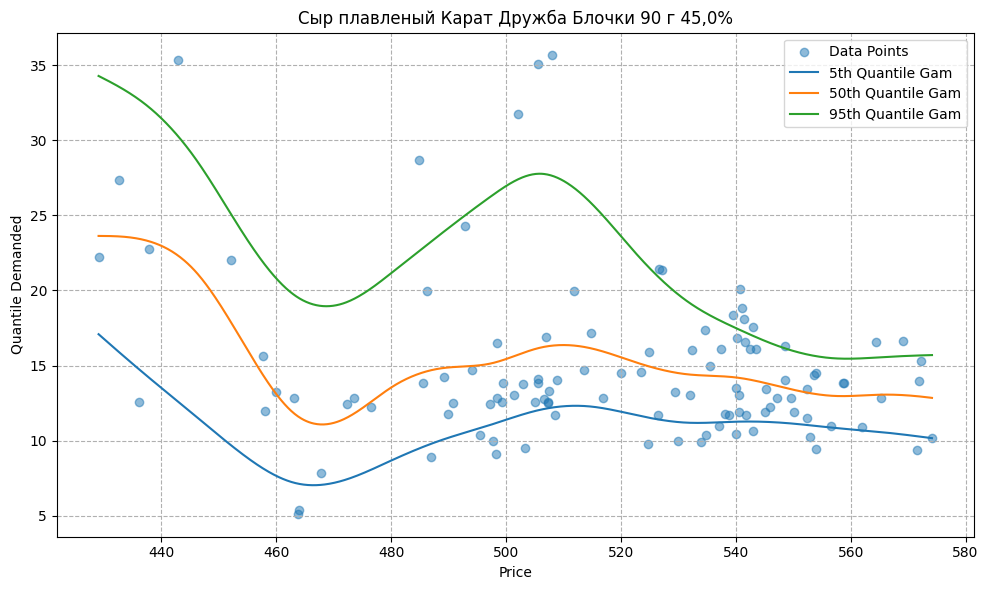

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X,y,alpha=0.5,label='Data Points')
XX = np.linspace(X.min(),X.max(),1000).reshape(-1,1)
for q,gam in gam_res.items():
   plt.plot(XX,gam.predict(XX),label=f'{int(q*100)}th Quantile Gam')
# plt.xlim(0, XX.max())
# plt.ylim(0, gam.predict(XX).max())
plt.xlabel('Price')
plt.ylabel('Quantile Demanded')
plt.title('Сыр плавленый Карат Дружба Блочки 90 г 45,0%') #'Сыр плавленый Карат Дружба Ванночки 200 г 45,0%','Сыр плавленый Карат Дружба Ванночки 400 г 45,0%','Сыр плавленый Карат Волна Блочки 90 г 45,0%'
plt.grid(True,which='both',linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
gam_res

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Исходные данные
prices = np.array([1324, 1706, 3735, 11195, 13751, 4755, 10556, 4733, 10701, 21422, 22981, 7994, 21457, 23159, 19329, 24965, 35538, 30202, 27719, 19388, 9006, 41747, 25271, 43175])
sales = np.array([584, 540, 504, 488, 447, 559, 483, 535, 466, 450, 432, 553, 452, 441, 450, 441, 456, 462, 468, 468, 533, 425, 486, 468])
# Создаем DataFrame
X = pd.DataFrame({'Price': prices})
y = pd.DataFrame({'Sales': sales})

# Добавляем константу для свободного члена
X = sm.add_constant(X)

# Создаем модель линейной регрессии
model = sm.OLS(y, X)

# Обучаем модель
results = model.fit()

# Выводим результаты
print(results.summary())

# Предсказываем значения
y_pred = results.predict(X)

# Строим график
plt.scatter(X['Price'], y, label='Data')
plt.plot(X['Price'], y_pred, color='red', label='Regression line')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from pygam import s,ExpectileGAM
from scipy.interpolate import interp1d
import plotly.express as px
import pytimetk as tk
import textwrap
import numpy as np


# Исходные данные
prices = np.array([1324, 1706, 3735, 11195, 13751, 4755, 10556, 4733, 10701, 21422, 22981, 7994, 21457, 23159, 19329, 24965, 35538, 30202, 27719, 19388, 9006, 41747, 25271, 43175])
sales = np.array([584, 540, 504, 488, 447, 559, 483, 535, 466, 450, 432, 553, 452, 441, 450, 441, 456, 462, 468, 468, 533, 425, 486, 468])
# Создаем DataFrame
data = pd.DataFrame({'Price': prices, 'Sales': sales})

# Создаем scatter plot с линией LOWESS
fig = px.scatter(data, x='Price', y='Sales', trendline='lowess')

# Показываем график
fig.show()

In [ ]:
all_gam_results = pd.DataFrame()
quantiles

In [1]:
# Путь к вашему Excel файлу
file_path = '/content/ALL_res_Sales_vol_price_Kod_TT.xlsx'

# Чтение данных из Excel файла
# Если файл содержит несколько листов, вы можете указать название или индекс листа с помощью параметра sheet_name
df_kod_TT = pd.read_excel(file_path, engine='openpyxl')



NameError: name 'pd' is not defined

In [19]:
import pandas as pd

# Чтение файла Excel
df = pd.read_excel('/content/df_Сыр плавленый Hochland Чизбургер Слайсы 150 г 45,0%.xlsx')

# Вывод первых нескольких строк DataFrame

In [20]:
my_list = ['301H','301W','302H','303C','303T','303Y','304L','304U','305I','305K']
df_kod_TT = df[df['Kod_TT'].isin(my_list)]
df_kod_TT


,Unnamed: 0,SALES VOL,PRICE PER UNIT,Kod_TT,SHARE VOL
12,12,8.40,728.020238,301H,0.102489
15,15,7.05,689.638298,301W,0.101761
18,18,6.00,665.700000,302H,0.105485
21,21,10.50,709.814286,303C,0.063652
25,25,13.50,695.510370,303T,0.116149
...,...,...,...,...,...
73647,73647,9.45,657.336508,303Y,0.112957
73649,73649,11.55,641.586147,304L,0.072151
73654,73654,7.95,657.477987,304U,0.065741
73655,73655,10.35,655.074396,305I,0.080866


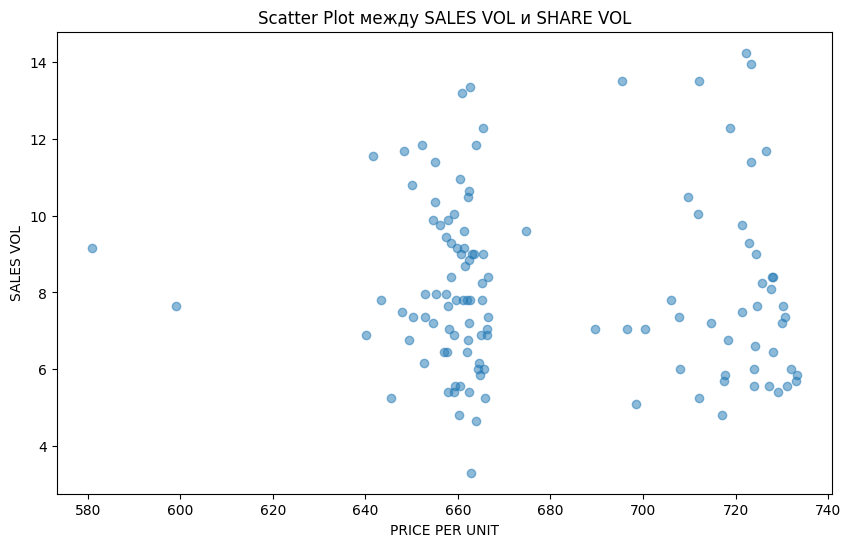

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Предположим, что df_kod_TT уже загружен
# Если нет, то загрузите его, например:
# df_kod_TT = pd.read_excel('/content/df_2_Сыр плавленый Hochland Ассорти Синее Сегменты 140 г 50,0%.xlsx')

# Построение scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_kod_TT['PRICE PER UNIT'], df_kod_TT['SALES VOL'], alpha=0.5)

# Добавление заголовков и меток осей
plt.title('Scatter Plot между SALES VOL и SHARE VOL')
plt.xlabel('PRICE PER UNIT')
plt.ylabel('SALES VOL')

# Отображение графика
plt.show()

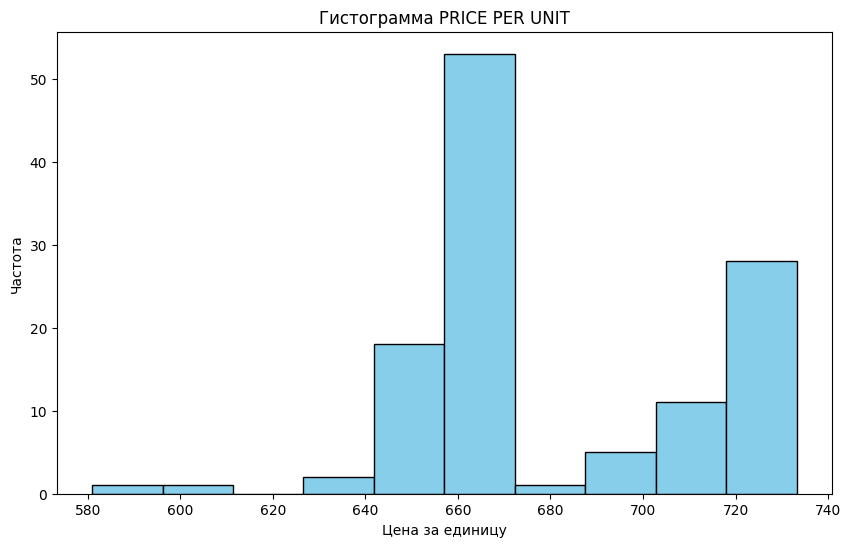

In [22]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(df_kod_TT['PRICE PER UNIT'], bins=10, color='skyblue', edgecolor='black')

# Добавление заголовков и меток осей
plt.title('Гистограмма PRICE PER UNIT')
plt.xlabel('Цена за единицу')
plt.ylabel('Частота')

# Отображение графика
plt.show()

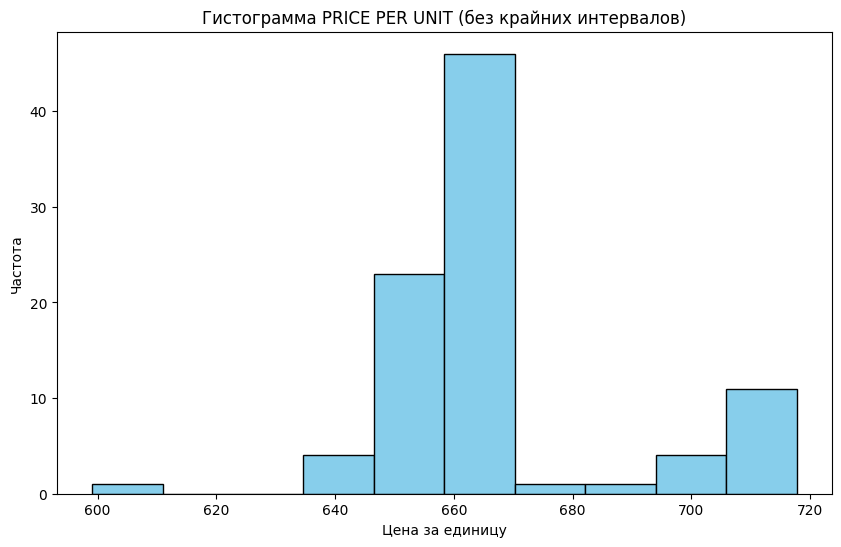

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Предположим, что df_kod_TT уже загружен
# Если нет, то загрузите его, например:
# df_kod_TT = pd.read_excel('/content/df_2_Сыр плавленый Hochland Ассорти Синее Сегменты 140 г 50,0%.xlsx')

# Получаем границы интервалов
counts, bin_edges = np.histogram(df_kod_TT['PRICE PER UNIT'], bins=10)

# Отрезаем по одному интервалу с каждого края
filtered_data = df_kod_TT[(df_kod_TT['PRICE PER UNIT'] > bin_edges[1]) & (df_kod_TT['PRICE PER UNIT'] < bin_edges[-2])]

# Построение гистограммы с отфильтрованными данными
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['PRICE PER UNIT'], bins=10, color='skyblue', edgecolor='black')

# Добавление заголовков и меток осей
plt.title('Гистограмма PRICE PER UNIT (без крайних интервалов)')
plt.xlabel('Цена за единицу')
plt.ylabel('Частота')

# Отображение графика
plt.show()

In [24]:
bin_edges[1]

596.1824940451171

In [25]:
bin_edges[-2]

717.9834300126105

In [26]:
18/20

0.9

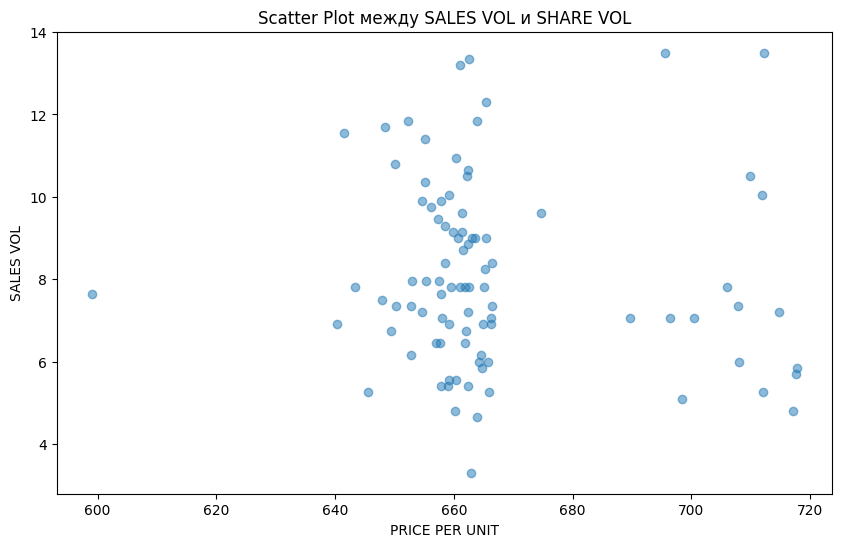

In [27]:
# Построение scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['PRICE PER UNIT'], filtered_data['SALES VOL'], alpha=0.5)

# Добавление заголовков и меток осей
plt.title('Scatter Plot между SALES VOL и SHARE VOL')
plt.xlabel('PRICE PER UNIT')
plt.ylabel('SALES VOL')

# Отображение графика
plt.show()

In [28]:
counts, bin_edges = np.histogram(df_kod_TT['PRICE PER UNIT'], bins=10)

In [29]:
counts

array([ 1,  1,  0,  2, 18, 53,  1,  5, 11, 28])

In [30]:
bin_edges

array([580.95737705, 596.18249405, 611.40761104, 626.63272804,
       641.85784503, 657.08296203, 672.30807902, 687.53319602,
       702.75831302, 717.98343001, 733.20854701])

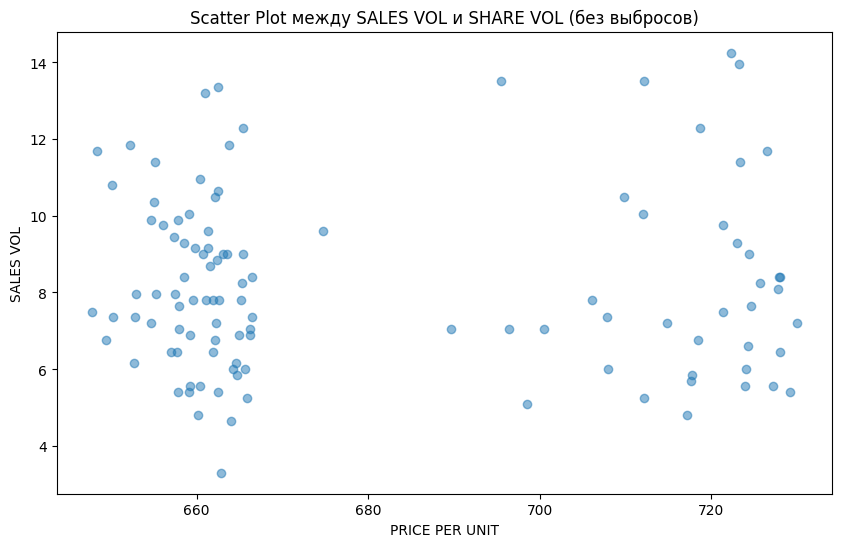

In [37]:
# Вычисление процентилей
lower_percentile = df_kod_TT['PRICE PER UNIT'].quantile(0.05)
upper_percentile = df_kod_TT['PRICE PER UNIT'].quantile(0.95)

# Фильтрация данных
df_filtered = df_kod_TT[(df_kod_TT['PRICE PER UNIT'] >= lower_percentile) & (df_kod_TT['PRICE PER UNIT'] <= upper_percentile)]
import matplotlib.pyplot as plt

# Построение scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['PRICE PER UNIT'], df_filtered['SALES VOL'], alpha=0.5)

# Добавление заголовков и меток осей
plt.title('Scatter Plot между SALES VOL и SHARE VOL (без выбросов)')
plt.xlabel('PRICE PER UNIT')
plt.ylabel('SALES VOL')

# Отображение графика
plt.show()

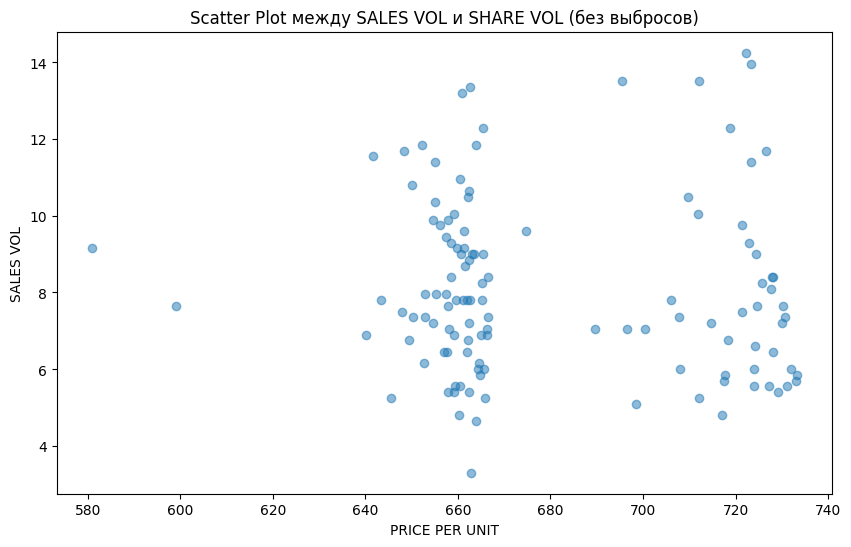

In [38]:
# Построение scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_kod_TT['PRICE PER UNIT'], df_kod_TT['SALES VOL'], alpha=0.5)

# Добавление заголовков и меток осей
plt.title('Scatter Plot между SALES VOL и SHARE VOL (без выбросов)')
plt.xlabel('PRICE PER UNIT')
plt.ylabel('SALES VOL')

# Отображение графика
plt.show()